## Intro to Artificial Neural Networks 
code from the book hands one machine learning CH10

In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
#load the Fashin MNIST dataset with Keras
fashin_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashin_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [7]:
# scale the features since we are going to use Gradient Descent
# split data to creat a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# class lables
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", 
               "Bag", "Ankle boot"]

In [11]:
# check class name for the first instance in train set
class_names[y_train[0]]

'Coat'

In [23]:
# sparese matrix: for each instance one target class index
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

### Build the neural network
Classification MLP with two hidden layers:

In [13]:
# creats a sequential model
model = keras.models.Sequential()
# preprocessing layer for flattenign the input into a 1D array
model.add(keras.layers.Flatten(input_shape=[28,28]))
# dense hidden layer 
model.add(keras.layers.Dense(300, activation='relu'))
# a second dense hidden layer 
model.add(keras.layers.Dense(100, activation='relu'))
# dense output layer with 10 neurons for each class
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


> a model with a lot of parameters is flexible to to fit the training data, but runs the risk of overfitting

In [15]:
model.layers

In [16]:
# you can assign a layer to a vairable to access the weigths and bais terms
hidden1 = model.layers[1]

In [17]:
weight, biases = hidden1.get_weights()

In [18]:
weight

array([[-0.06561681, -0.01007127, -0.03404382, ..., -0.03013198,
        -0.00970574,  0.07134555],
       [ 0.07013842, -0.02174164, -0.01210014, ...,  0.06578036,
         0.04814156, -0.07108127],
       [ 0.04761191,  0.04519758,  0.02097865, ...,  0.05329473,
        -0.05936547,  0.02540341],
       ...,
       [-0.04413927, -0.06925163,  0.02512276, ..., -0.05310022,
        -0.04111626, -0.03383904],
       [-0.04858155,  0.02645062, -0.0438199 , ...,  0.00339437,
        -0.01116655, -0.05369151],
       [ 0.04296245,  0.0306832 , -0.0383765 , ..., -0.04898406,
        -0.05915558,  0.05596952]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

the model needs to be compiled to specify a loss function and which optimizer to use:

we will use `sparse_categorical_crossentropy` because we have a sparse matrix indicating only the class index from 0 to 9. With one-hot vectors we would use `categorical_crossentropy` 

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [24]:
histroy = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7048 - accuracy: 0.7715 - val_loss: 0.5022 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8293 - val_loss: 0.4412 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4456 - accuracy: 0.8447 - val_loss: 0.4359 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4186 - accuracy: 0.8531 - val_loss: 0.4063 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3988 - accuracy: 0.8596 - val_loss: 0.4058 - val_accuracy: 0.8538
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8652 - val_loss: 0.3693 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8692 - val_loss: 0.3601 - val_accuracy:

> if the performance  on the training data set is much better than on the validation set, your model is probably overfitting the training set

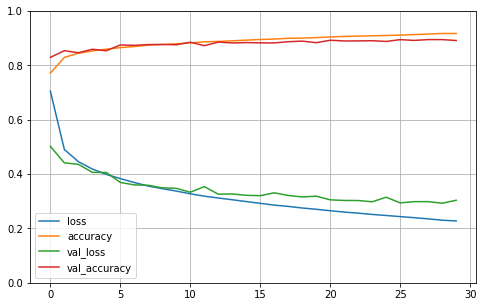

In [29]:
# creats a pandas Datafram to plot the metrics
pd.DataFrame(histroy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

> there is not much overfitting since the curves for train and val are relatively close to each other 

In [30]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.9246 - accuracy: 0.8360


[75.92461395263672, 0.8360000252723694]

### Use the trained model to make predictions

In [34]:
# predit the first three instances from the test set
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)